In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import sklearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
def join_two_datasets(df, other_df, fields):

    df['fips'] = df['fips'].astype(int)
    other_df['fips'] = other_df['fips'].astype(int)
    return pd.merge(df, other_df, on=fields, how='inner')

def read_csv(df_name):
    return pd.read_csv(df_name + '_processed.csv')

In [7]:

df_select = join_two_datasets(read_csv('earnings'), read_csv('water_usage'), 'fips')
df_select.columns

Index(['geo_id', 'fips', 'county_x', 'total_med', 'total_agri_fish_mine',
       'agri_fish_hunt', 'mining_quarrying_oilgas_extract', 'construction',
       'manufacturing', 'wholesale_trade', 'retail_trade',
       'transport_warehouse_utilities', 'transport_warehouse', 'utilities',
       'information', 'fin_ins_realest', 'fin_ins', 'realest_rent_lease',
       'total_prof_sci_mgmt_admin', 'prof_sci_tech', 'mgmt', 'admin_sup',
       'total_edu_health_social', 'edu_serv', 'health_social',
       'total_arts_ent_acc_food', 'arts_ent_rec', 'acc_food_serv', 'other_ser',
       'pub_admin', 'year_x', 'state', 'state_fips', 'county_y', 'county_fips',
       'year_y', 'population', 'ps_total', 'd_selfsupplied', 'd_totaluse',
       'ir_sprinkler', 'ir_microirrig', 'ir_surface', 'ir_total',
       'crop_ir_sprinkler', 'crop_ir_microirrig', 'crop_ir_surface',
       'crop_ir_total', 'therm_power', 'therm_power_oncethrough',
       'therm_power_recirc'],
      dtype='object')

## Field Descriptions

In [8]:
metrics = ['value', 'pop_served']
df_select['total_med'].describe()

count    21994.000000
mean     29899.578476
std       5369.846988
min      12533.000000
25%      26540.000000
50%      29232.000000
75%      31935.500000
max      72185.000000
Name: total_med, dtype: float64

## Scatter/Bar/Histograms

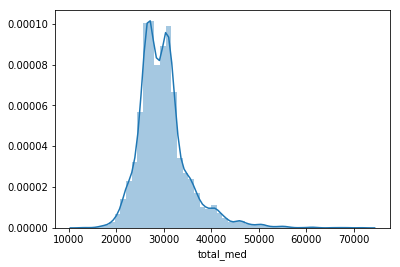

In [9]:
sns.distplot(df_select['total_med'])

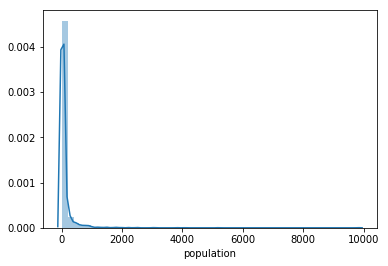

In [10]:
sns.distplot(df_select['population'])

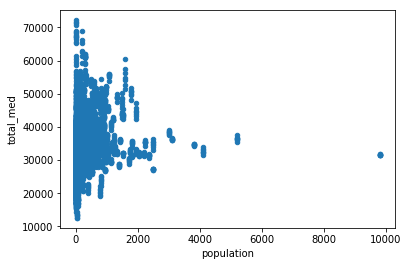

In [11]:
df_select.plot.scatter(x='population', y='total_med')

## Categorical Variable Comparison

In [ ]:
fig = sns.boxplot(x='county_x', y="fips", data=df_select)

## Correlation Matrix

In [ ]:
corrmat = df_select.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

In [65]:
sns.set()
cols = ['total_med', 'edu_serve', 'retail_trade', 'population']
sns.pairplot(df_select[cols], size = 2.5)
plt.show();

KeyError: "['edu_serve'] not in index"

In [66]:
total = df_select.isnull().sum().sort_values(ascending=False)
percent = (df_select.isnull().sum()/df_select.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
mgmt,9,0.9
mining_quarrying_oilgas_extract,3,0.3
realest_rent_lease,1,0.1
therm_power_recirc,0,0.0
transport_warehouse,0,0.0
total_edu_health_social,0,0.0
admin_sup,0,0.0
prof_sci_tech,0,0.0
total_prof_sci_mgmt_admin,0,0.0
fin_ins,0,0.0
